In [55]:
from openpyxl import Workbook, load_workbook
import pandas as pd
from openpyxl.utils.dataframe import dataframe_to_rows as df_to_row
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
from szp_funcs import print_df

In [57]:
path_to_file = 'C:/Users/PetukhovMD/Desktop/ХВС/2кв/data.xlsx'
resource_types = ['cws', 'hws', 'el', 'heat']

In [58]:
res = pd.read_excel(path_to_file)

In [59]:
res

,sch,real_cws,perc_cws,type,real_hws,perc_hws,area,real_el,perc_el,real_heat,perc_heat
0,ГБОУ Школа № 1501,3.784352,76.144139,Школы с интернатами,1.708609,-12.673733,NaN,129.377637,4.858041,0.853791,-8.618495
1,ГБОУ Школа № 108,9.632463,43.685767,Школы с интернатами,2.927239,-30.600479,NaN,208.451493,-5.571433,1.902985,-43.878669
2,ГБОУ Школа ''Интеллектуал'',4.486432,-6.393717,Школы с интернатами,2.107027,2.094964,NaN,263.162162,-4.078344,1.849814,37.809743
3,ГБОУ Школа № 1454 ''Тимирязевская'',2.930846,22.975818,Школы с интернатами,1.084953,11.302409,NaN,135.344990,15.403725,1.279928,-1.440096
4,ГБОУ Школа № 158,3.094825,14.502299,Школы с интернатами,0.987215,-20.918599,NaN,274.624763,166.188106,1.500309,37.354801
...,...,...,...,...,...,...,...,...,...,...,...
556,ГБОУДО ЦВР ''Синегория'',0.170291,-40.923934,УДО без бассейнов,0.070976,-51.300474,NaN,19.215823,-17.313370,0.210035,-13.314169
557,"ГБОУ ДО ЦРТДЮ ""Пресня""",0.231449,-83.887339,УДО без бассейнов,0.000000,0.000000,NaN,14.204653,-28.147548,0.058739,-40.164006
558,ГБДОУ Детский сад № 766,3.714091,-25.486126,ДОУ,2.125713,17.515622,NaN,159.286585,-18.817731,1.176512,3.163961
559,ГБДОУ Детский сад № 754 ''Солнышко'',8.000000,54.152824,ДОУ,5.918851,35.188394,NaN,254.122807,7.663424,2.855491,-10.021736


In [68]:
from dython.nominal import associations

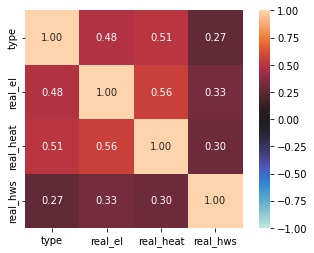

{'corr':                type   real_el  real_heat  real_hws
 type       1.000000  0.482007   0.507388  0.272079
 real_el    0.482007  1.000000   0.560683  0.328054
 real_heat  0.507388  0.560683   1.000000  0.298161
 real_hws   0.272079  0.328054   0.298161  1.000000,
 'ax': <AxesSubplot:>}

In [70]:
associations(res[['type', 'real_el', 'real_heat', 'real_hws']])

In [62]:
def give_real_grp(row, resource, mean, std):
    if row['real_' + resource] < mean - std:
        return f'Менее {mean - std:.2f}'
    if row['real_' + resource] > mean + std:
        return f'Более {mean + std:.2f}'
    return f'{mean - std:.2f} - {mean + std:.2f}'

In [63]:
def give_perc_grp(row, resource, low = -10, high = 10):
    if row['perc_' + resource] < low:
        return f'Снижение более чем на {high}%'
    if row['perc_' + resource] > high:
        return f'Повышение более чем на {high}%'
    return f'от {low}% - до {high}%'

In [64]:
for resource in resource_types:
    mean, std = res['real_' + resource].describe()[['mean', 'std']]
    if resource == 'hws':
        mean, std = res[res.area.isna()]['real_' + resource].describe()[['mean', 'std']]
    res['real_grp_' + resource] = res.apply(lambda row: give_real_grp(row, resource, mean, std), axis=1)
    res['perc_grp_' + resource] = res.apply(lambda row: give_perc_grp(row, resource), axis=1)

In [65]:
for resource in resource_types:
    mean, std = res['real_' + resource].describe()[['mean', 'std']]
    if resource == 'hws':
        mean, std = res[res.area.isna()]['real_' + resource].describe()[['mean', 'std']]
    print(f'{resource}: mean - {mean}; std - {std}')

cws: mean - 2.5289427748039826; std - 1.267560039075108
hws: mean - 1.339534840714518; std - 1.176825404276894
el: mean - 144.2637359466988; std - 77.13161597448529
heat: mean - 1.042778013084352; std - 0.4824890973692011


In [66]:
res

,sch,real_cws,perc_cws,type,real_hws,perc_hws,area,real_el,perc_el,real_heat,perc_heat,real_grp_cws,perc_grp_cws,real_grp_hws,perc_grp_hws,real_grp_el,perc_grp_el,real_grp_heat,perc_grp_heat
0,ГБОУ Школа № 1501,3.784352,76.144139,Школы с интернатами,1.708609,-12.673733,NaN,129.377637,4.858041,0.853791,-8.618495,1.26 - 3.80,Повышение более чем на 10%,0.16 - 2.52,Снижение более чем на 10%,67.13 - 221.40,от -10% - до 10%,0.56 - 1.53,от -10% - до 10%
1,ГБОУ Школа № 108,9.632463,43.685767,Школы с интернатами,2.927239,-30.600479,NaN,208.451493,-5.571433,1.902985,-43.878669,Более 3.80,Повышение более чем на 10%,Более 2.52,Снижение более чем на 10%,67.13 - 221.40,от -10% - до 10%,Более 1.53,Снижение более чем на 10%
2,ГБОУ Школа ''Интеллектуал'',4.486432,-6.393717,Школы с интернатами,2.107027,2.094964,NaN,263.162162,-4.078344,1.849814,37.809743,Более 3.80,от -10% - до 10%,0.16 - 2.52,от -10% - до 10%,Более 221.40,от -10% - до 10%,Более 1.53,Повышение более чем на 10%
3,ГБОУ Школа № 1454 ''Тимирязевская'',2.930846,22.975818,Школы с интернатами,1.084953,11.302409,NaN,135.344990,15.403725,1.279928,-1.440096,1.26 - 3.80,Повышение более чем на 10%,0.16 - 2.52,Повышение более чем на 10%,67.13 - 221.40,Повышение более чем на 10%,0.56 - 1.53,от -10% - до 10%
4,ГБОУ Школа № 158,3.094825,14.502299,Школы с интернатами,0.987215,-20.918599,NaN,274.624763,166.188106,1.500309,37.354801,1.26 - 3.80,Повышение более чем на 10%,0.16 - 2.52,Снижение более чем на 10%,Более 221.40,Повышение более чем на 10%,0.56 - 1.53,Повышение более чем на 10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,ГБОУДО ЦВР ''Синегория'',0.170291,-40.923934,УДО без бассейнов,0.070976,-51.300474,NaN,19.215823,-17.313370,0.210035,-13.314169,Менее 1.26,Снижение более чем на 10%,Менее 0.16,Снижение более чем на 10%,Менее 67.13,Снижение более чем на 10%,Менее 0.56,Снижение более чем на 10%
557,"ГБОУ ДО ЦРТДЮ ""Пресня""",0.231449,-83.887339,УДО без бассейнов,0.000000,0.000000,NaN,14.204653,-28.147548,0.058739,-40.164006,Менее 1.26,Снижение более чем на 10%,Менее 0.16,от -10% - до 10%,Менее 67.13,Снижение более чем на 10%,Менее 0.56,Снижение более чем на 10%
558,ГБДОУ Детский сад № 766,3.714091,-25.486126,ДОУ,2.125713,17.515622,NaN,159.286585,-18.817731,1.176512,3.163961,1.26 - 3.80,Снижение более чем на 10%,0.16 - 2.52,Повышение более чем на 10%,67.13 - 221.40,Снижение более чем на 10%,0.56 - 1.53,от -10% - до 10%
559,ГБДОУ Детский сад № 754 ''Солнышко'',8.000000,54.152824,ДОУ,5.918851,35.188394,NaN,254.122807,7.663424,2.855491,-10.021736,Более 3.80,Повышение более чем на 10%,Более 2.52,Повышение более чем на 10%,Более 221.40,от -10% - до 10%,Более 1.53,Снижение более чем на 10%


In [67]:
print_df(res, '/'.join(path_to_file.split('/')[:-1]) + '/для сводов')

In [62]:
res['type'].unique().tolist()

['Школы с интернатами',
 'Школы с бассейнами',
 'Школы без интернатов и бассейнов',
 'Колледжи с интернатами',
 'Колледжи с бассейнами',
 'Колледжи без интернатов и бассейнов',
 'УДО с бассейнами',
 'УДО без бассейнов',
 'ДОУ',
 'ВПО']

In [111]:
res.corr(method='pearson')

,real,perc,real_all,cont
real,1.000000,0.195142,0.500266,-0.097846
perc,0.195142,1.000000,0.025321,-0.083096
real_all,0.500266,0.025321,1.000000,0.719363
cont,-0.097846,-0.083096,0.719363,1.000000


In [67]:
def give_type_grp(row):
    if (row['type'].find('Школы') != -1) or (row['type'].find('Колледжи') != -1):
        return 'Колледжи и Школы'
    if row['type'].find('УДО') != -1:
        return 'УДО'
    return row['type']

In [115]:
res['type_grp'] = res.apply(lambda row: give_type_grp(row), axis=1)

In [69]:
res['type_grp'].unique()

array(['Колледжи и Школы', 'УДО', 'ДОУ', 'ВПО'], dtype=object)

In [77]:
res.groupby('type_grp')['real'].describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99]).loc['Колледжи и Школы'][['mean', 'std']].to_dict()

{'mean': 1.3281002746828714, 'std': 0.6539578214009316}

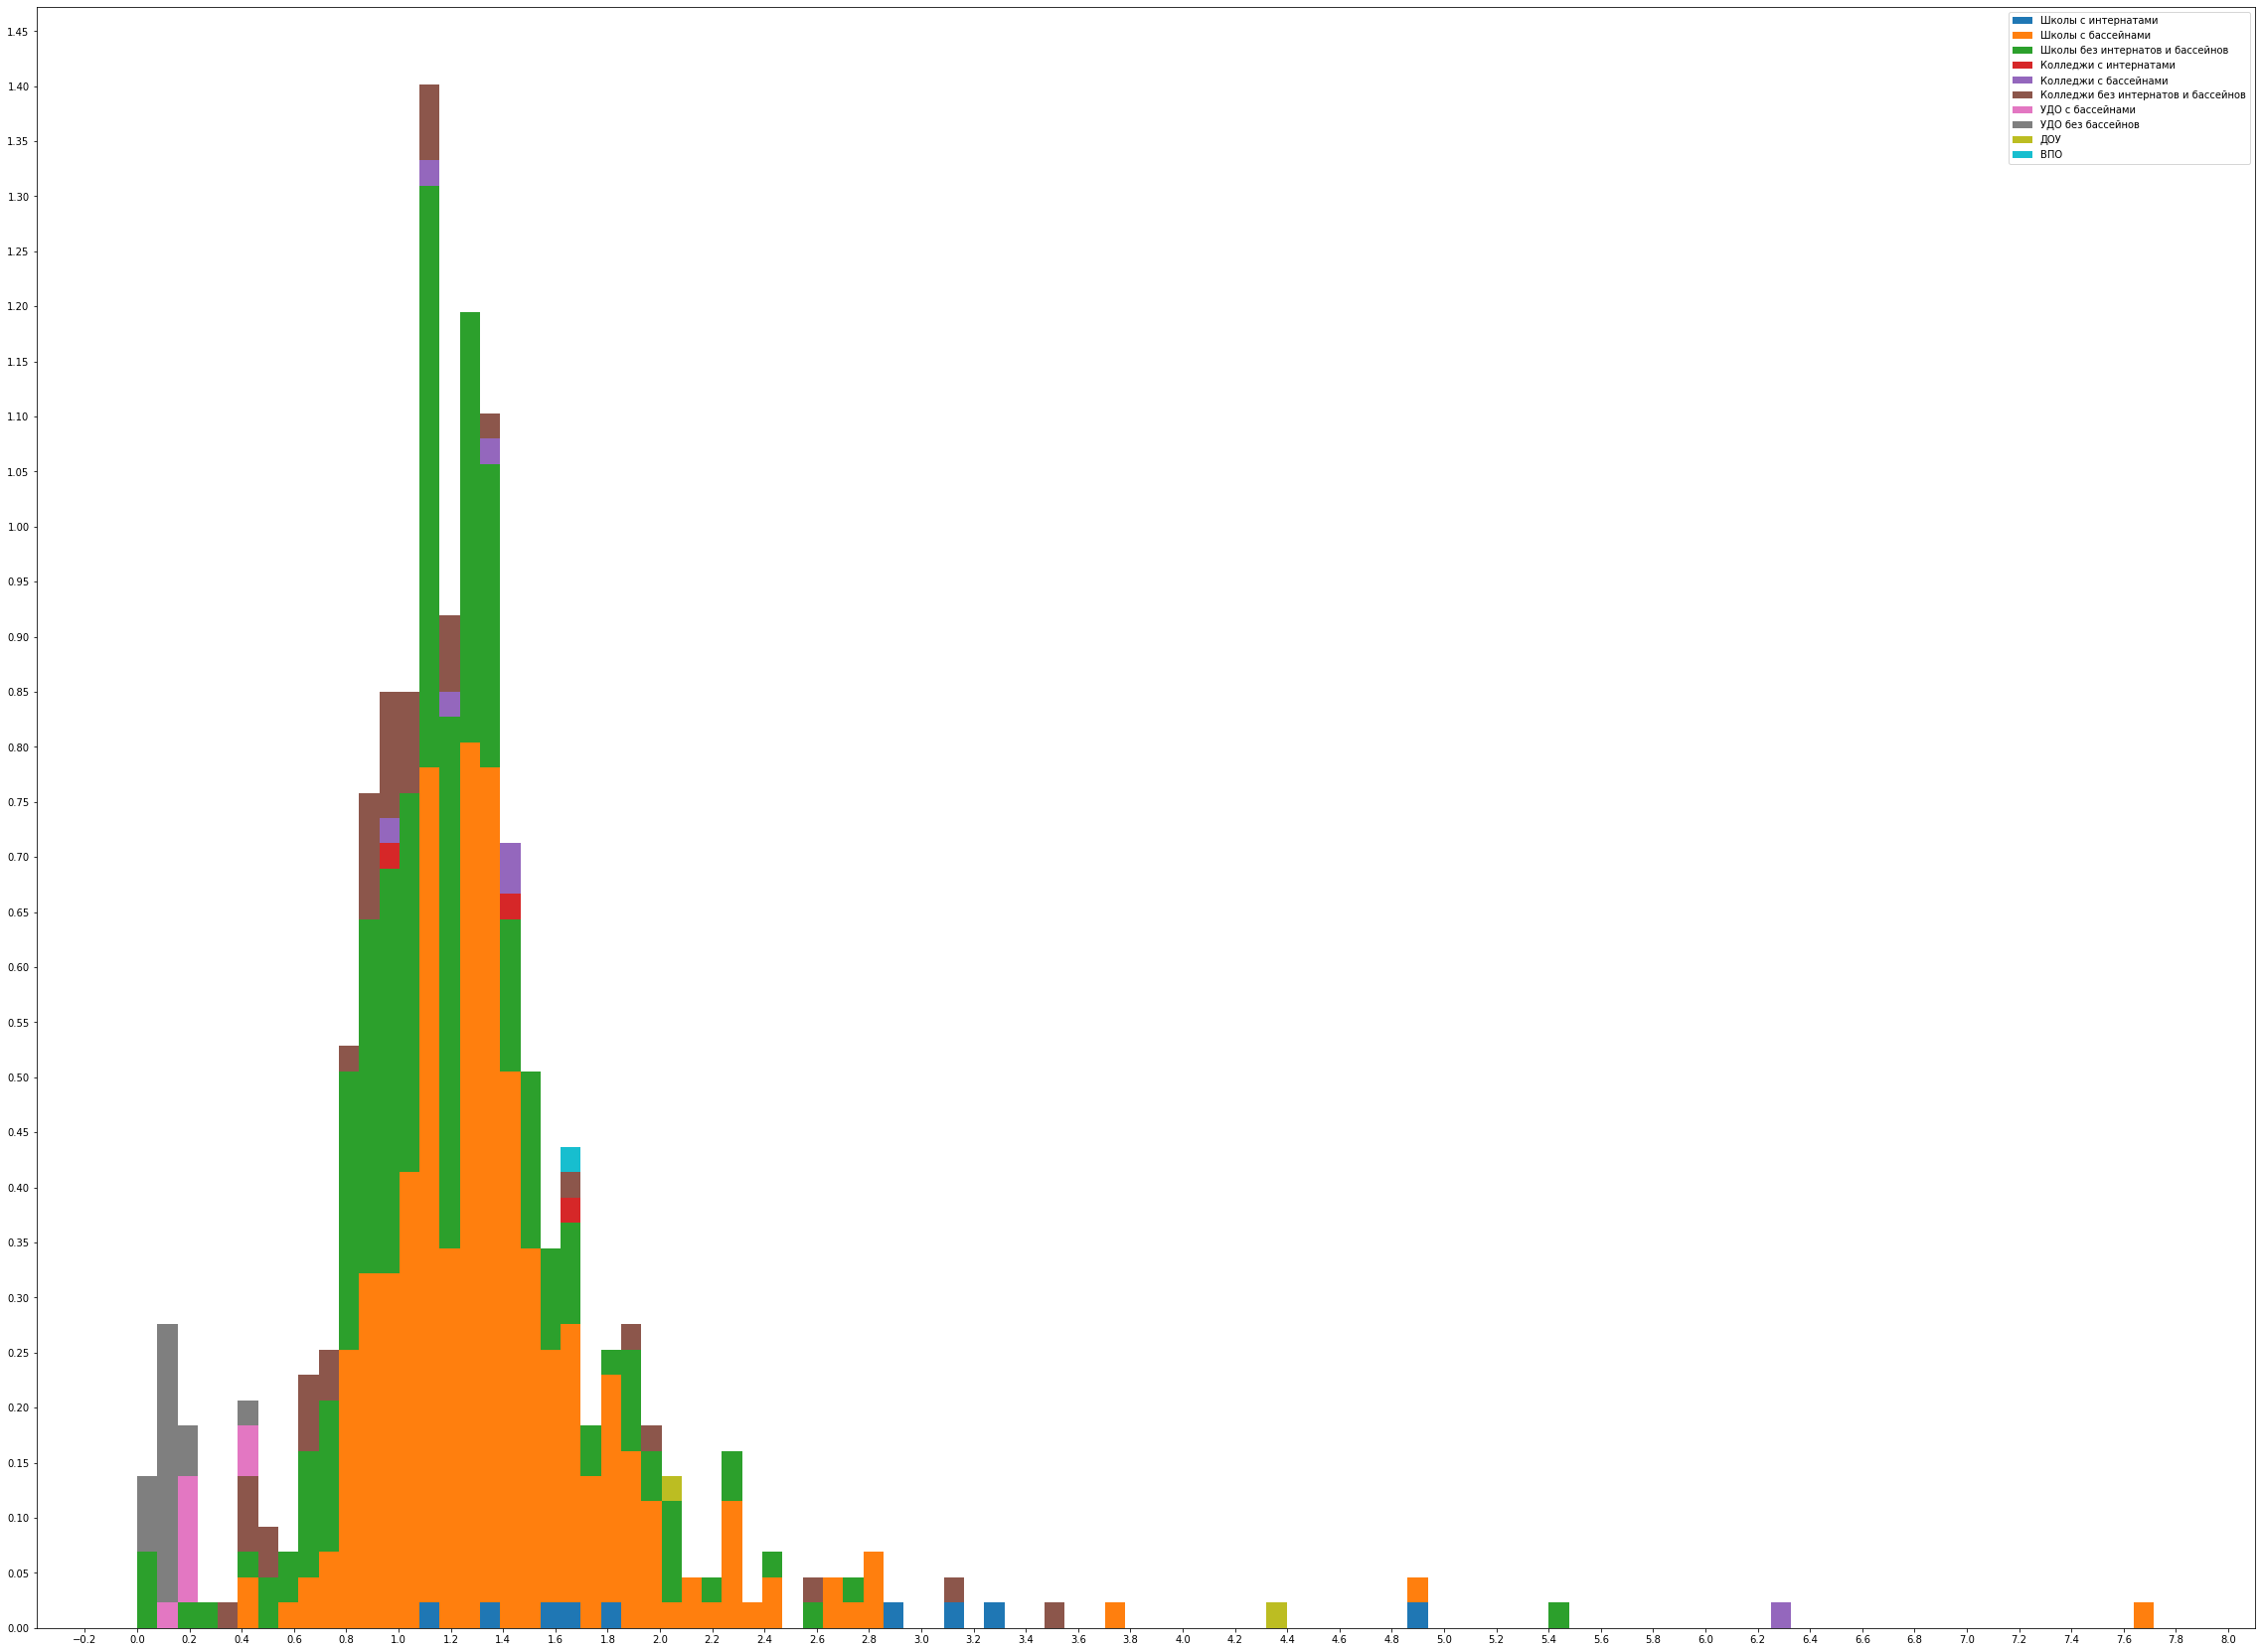

In [103]:
groups_stats_all = {}
data = []
for grp in res['type'].unique().tolist():
    groups_stats_all[grp] = res.groupby('type')['real'].describe().loc[grp][['mean', 'std']].to_dict()
    data.append(res.groupby('type').get_group(grp)['real'])
plt.hist(data, 100, histtype='bar', stacked=True, density=True)
plt.legend([grp for grp in res['type'].unique().tolist()])
ax = plt.gca()
ax.locator_params('x', nbins= 50)
ax.locator_params('y', nbins= 40)
plt.rcParams['figure.figsize'] = (40, 30)
plt.savefig('all_types_cold_water.png', dpi=400)

In [79]:
groups_stats

{'Колледжи и Школы': {'mean': 1.3281002746828714, 'std': 0.6539578214009316},
 'УДО': {'mean': 0.16421855170332048, 'std': 0.11203920939270252},
 'ДОУ': {'mean': 3.185176801129269, 'std': 1.6404254252619679},
 'ВПО': {'mean': 1.6334981646137532, 'std': nan}}

In [104]:
groups_stats_all

{'Школы с интернатами': {'mean': 2.410269677983989, 'std': 1.218887922122963},
 'Школы с бассейнами': {'mean': 1.3938733660607006, 'std': 0.6079323502099434},
 'Школы без интернатов и бассейнов': {'mean': 1.1988733088066403,
  'std': 0.5225652410039062},
 'Колледжи с интернатами': {'mean': 1.3548635642240097,
  'std': 0.3520801677197876},
 'Колледжи с бассейнами': {'mean': 1.956753011668861,
  'std': 1.9009955716950988},
 'Колледжи без интернатов и бассейнов': {'mean': 1.1123333413415364,
  'std': 0.6852319525140397},
 'УДО с бассейнами': {'mean': 0.2453051489619981, 'std': 0.12442732796260181},
 'УДО без бассейнов': {'mean': 0.12606015299335452,
  'std': 0.08497732759354029},
 'ДОУ': {'mean': 3.185176801129269, 'std': 1.6404254252619679},
 'ВПО': {'mean': 1.6334981646137532, 'std': nan}}

TypeError: cannot unpack non-iterable PathCollection object

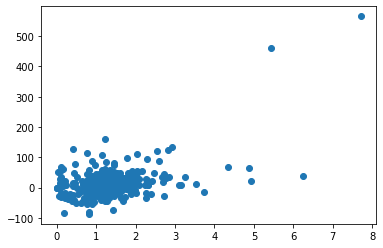

In [36]:
plt.scatter(x=res[res.perc < 1000]['real'].to_list(), y=res[res.perc < 1000]['perc'].to_list())

TypeError: 'PathCollection' object is not subscriptable

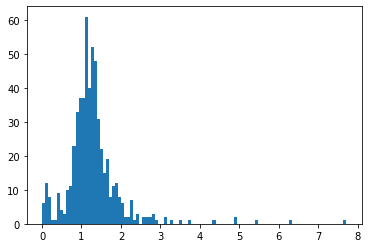

In [37]:
n_real, bins_real, patches_real = plt.hist(res['real'].to_list(), 100)

In [43]:
n_real

array([ 6., 12.,  8.,  1.,  1.,  9.,  4.,  3., 10., 11., 23., 33., 37.,
       37., 61., 40., 52., 48., 31., 22., 15., 19.,  8., 11., 12.,  8.,
        6.,  2.,  2.,  7.,  1.,  3.,  0.,  2.,  2.,  2.,  3.,  1.,  0.,
        0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [44]:
n_real.tolist().index(23)

10

In [42]:
n_real.tolist().index(22)

19

In [40]:
bins_real

array([0.        , 0.07715274, 0.15430549, 0.23145823, 0.30861097,
       0.38576372, 0.46291646, 0.5400692 , 0.61722195, 0.69437469,
       0.77152743, 0.84868018, 0.92583292, 1.00298566, 1.08013841,
       1.15729115, 1.2344439 , 1.31159664, 1.38874938, 1.46590213,
       1.54305487, 1.62020761, 1.69736036, 1.7745131 , 1.85166584,
       1.92881859, 2.00597133, 2.08312407, 2.16027682, 2.23742956,
       2.3145823 , 2.39173505, 2.46888779, 2.54604053, 2.62319328,
       2.70034602, 2.77749876, 2.85465151, 2.93180425, 3.00895699,
       3.08610974, 3.16326248, 3.24041522, 3.31756797, 3.39472071,
       3.47187346, 3.5490262 , 3.62617894, 3.70333169, 3.78048443,
       3.85763717, 3.93478992, 4.01194266, 4.0890954 , 4.16624815,
       4.24340089, 4.32055363, 4.39770638, 4.47485912, 4.55201186,
       4.62916461, 4.70631735, 4.78347009, 4.86062284, 4.93777558,
       5.01492832, 5.09208107, 5.16923381, 5.24638655, 5.3235393 ,
       5.40069204, 5.47784478, 5.55499753, 5.63215027, 5.70930

In [46]:
bins_real[11]

0.8486801779535343

In [47]:
bins_real[19]

1.4659021255561049

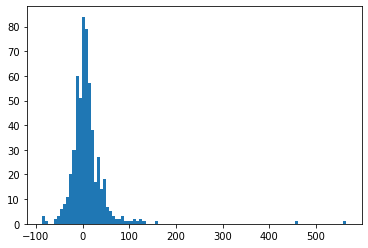

In [38]:
n_perc, bins_perc, patches_perc = plt.hist(res[res.perc < 1000]['perc'].to_list(), 100)

In [48]:
n_perc

array([ 3.,  1.,  0.,  0.,  2.,  3.,  6.,  8., 11., 20., 30., 60., 51.,
       84., 79., 57., 38., 17., 27., 14., 18.,  7.,  5.,  3.,  2.,  2.,
        3.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [50]:
n_perc.tolist().index(8)

7

In [51]:
bins_perc[8]

-34.759390467157154

In [52]:
n_perc.tolist().index(7)

21

In [53]:
bins_perc[21]

50.06854400471779

In [49]:
bins_perc

array([-86.9611963 , -80.43597057, -73.91074484, -67.38551911,
       -60.86029338, -54.33506765, -47.80984192, -41.2846162 ,
       -34.75939047, -28.23416474, -21.70893901, -15.18371328,
        -8.65848755,  -2.13326182,   4.3919639 ,  10.91718963,
        17.44241536,  23.96764109,  30.49286682,  37.01809255,
        43.54331828,  50.068544  ,  56.59376973,  63.11899546,
        69.64422119,  76.16944692,  82.69467265,  89.21989838,
        95.7451241 , 102.27034983, 108.79557556, 115.32080129,
       121.84602702, 128.37125275, 134.89647848, 141.42170421,
       147.94692993, 154.47215566, 160.99738139, 167.52260712,
       174.04783285, 180.57305858, 187.09828431, 193.62351003,
       200.14873576, 206.67396149, 213.19918722, 219.72441295,
       226.24963868, 232.77486441, 239.30009013, 245.82531586,
       252.35054159, 258.87576732, 265.40099305, 271.92621878,
       278.45144451, 284.97667023, 291.50189596, 298.02712169,
       304.55234742, 311.07757315, 317.60279888, 324.12

In [131]:
mean - std, mean + std

(0.5891620951278587, 1.978111177175242)

In [127]:
res['real_grp'] = res.apply(lambda row: give_real_grp(row), axis=1)
res['perc_grp'] = res.apply(lambda row: give_perc_grp(row), axis=1)

In [128]:
res[(res.real_grp == 'small') & (res.perc_grp == 'small')]

,sch,real,perc,type,real_all,cont,type_grp,real_grp,perc_grp
237,"ГБОУ Школа № 1534 ""АКАДЕМИЧЕСКАЯ""",0.579548,-10.053218,Школы с бассейнами,2335.000,4029.0,Колледжи и Школы,small,small
292,ГБОУ Школа № 1238,0.390257,-43.861793,Школы с бассейнами,2187.000,5604.0,Колледжи и Школы,small,small
457,ГБОУ Школа № 1383,0.585408,-14.169379,Школы без интернатов и бассейнов,1091.200,1864.0,Колледжи и Школы,small,small
469,ГАОУ Школа № 548,0.528231,-21.236860,Школы без интернатов и бассейнов,3078.000,5827.0,Колледжи и Школы,small,small
479,ГБОУ Школа № 1520 им. Капцовых,0.299794,-39.260042,Школы без интернатов и бассейнов,609.482,2033.0,Колледжи и Школы,small,small
480,ГБОУ Школа № 2042,0.439582,-40.053869,Школы без интернатов и бассейнов,315.620,718.0,Колледжи и Школы,small,small
486,ГБОУ Школа № 1249,0.181728,-82.594614,Школы без интернатов и бассейнов,108.310,596.0,Колледжи и Школы,small,small
529,ГАПОУ ПК № 8 им. И.Ф. Павлова,0.335385,-20.467475,Колледжи без интернатов и бассейнов,545.000,1625.0,Колледжи и Школы,small,small
531,ГБПОУ КБТ,0.414191,-23.549743,Колледжи без интернатов и бассейнов,502.000,1212.0,Колледжи и Школы,small,small
534,ГБПОУ ЭТК № 22,0.493844,-50.740430,Колледжи без интернатов и бассейнов,402.977,816.0,Колледжи и Школы,small,small


In [129]:
res[(res.real_grp == 'big') & (res.perc_grp == 'big')]

,sch,real,perc,type,real_all,cont,type_grp,real_grp,perc_grp
0,ГБОУ Школа № 1501,2.918081,132.751453,Школы с интернатами,12924.180,4429.0,Колледжи и Школы,big,big
1,ГБОУ Школа № 108,4.878277,64.327298,Школы с интернатами,2605.000,534.0,Колледжи и Школы,big,big
2,ГБОУ Школа ''Интеллектуал'',3.247956,35.721087,Школы с интернатами,1192.000,367.0,Колледжи и Школы,big,big
9,ГБОУ Школа № 1220,7.715274,565.561377,Школы с бассейнами,15608.000,2023.0,Колледжи и Школы,big,big
10,ГБОУ Школа № 629,2.821034,123.853209,Школы с бассейнами,7368.540,2612.0,Колледжи и Школы,big,big
12,ГБОУ Школа № 2005,2.297164,95.137498,Школы с бассейнами,7452.000,3244.0,Колледжи и Школы,big,big
14,ГБОУ Школа № 851,2.167500,55.255592,Школы с бассейнами,6936.000,3200.0,Колледжи и Школы,big,big
20,ГБОУ Школа № 1494,2.455696,46.885212,Школы с бассейнами,9312.000,3792.0,Колледжи и Школы,big,big
24,ГБОУ Школа № 2123 им. М. Эрнандеса,2.005794,45.673400,Школы с бассейнами,4753.731,2370.0,Колледжи и Школы,big,big
26,ГБОУ Школа № 2129,2.715324,43.530716,Школы с бассейнами,9272.832,3415.0,Колледжи и Школы,big,big


In [60]:
'/'.join(path_to_file.split('/')[:-1])

'C:/Users/PetukhovMD/Desktop/ХВС'

In [130]:
#print_df(res, '/'.join(path_to_file.split('/')[:-1]) + '/для сводов')